In [ ]:
# urllib library 활용 방법

from urllib import request

urllib.request  # open url

urllib.error    # containing the exceptions

urllib.parse    # parsing urls

urllib.robotparser  # parsing robots.txt 잘 안돌아감

urllib.response # 원래는 urllib에 속한 애는 아님 / http 객체가 response를 보내는데 이걸 잠시 사용하는 것이다

In [2]:
# domain/robots.txt ==> robots.txt를 뜨게 만들어줌
# sitemap.xml => search 시에 잘 뜨게끔 만들게 해주는 도구
# 이떄, xml은 태그 안에 다른 태그가 올 수 없다

# DOM => HTML 코드를 object로 해석해서 보여주는 것 (개발자 도구에서 보여지는 elements)
# console tab => javascript 예를 들어서 a = 1을 넣으면 a가 나오고 JSON obj도 볼 수 있다
# Network => Preserve Log (페이지가 바뀌어도 log를 보존해줌)
# Fetch/XHR => ajax 같은 것들
# Network 탭에서 request, response header가 존재한다

# RobotFileParser
# robot = robotparser.RObotFileParser()
# robot.set_url('robots.txt')
# robot.read()
# robot.can_fetch('agent name', 'robots.txt')

In [4]:
from urllib import robotparser

In [14]:
url = 'https://www.google.com/robots.txt'
url = 'https://www.naver.com/robots.txt'
url = 'https://news.naver.com/robots.txt'
url = 'https://lms.sunde41.net/robots.txt'  # robots.txt가 없는 페이지
rp = robotparser.RobotFileParser(url)
rp.read()

In [15]:
rp.can_fetch('Bot', '/search/about')    # /search/about에서 접근 가능한지 True or False 로 return함
# lms의 경우는 무조건 True 왜? robots.txt가 없으므로

True

In [16]:
rp.can_fetch('Yeti', '/main/imagemontage')  # Yeti는 접근 가능한가? 가능하다
# 즉, 우리가 만드는 bot 이름을 yeti로 만들면 가능할 수 있다
# 정말 우연히 겹쳐서...
# 하지만, IP가 달라서 관리자는 안다
# 얘로 우리 봇이 돌 수 있는지 봐바야함
# url을 분리시킬줄 알아야 함

True

In [147]:
rp.url, rp.host, rp.path
rp.set_url('https://www.google.com/robots.txt')
rp.read()
# set_url로 바꿀 수 있다

In [19]:
# Request
# urlopen 이라는 함수 사용
# String, request object를 활용하여 오픈
# 응답이 오면 http.client.HTTPResponse로 받아옴 얘는 그냥 http에서 주는것임

In [142]:
from urllib import request

In [148]:
url = 'https://www.google.com'
resp = request.urlopen(url)    # carpath = 인증서 보낼 때 / data = return하는 data type 을 지정해줌

In [144]:
type(resp)

http.client.HTTPResponse

In [25]:
# TCP/IP 에서는 기본적으로 binary값으로 값을 주고 보냄
# HTTP를 통해서 요청하면 text로 받을 수 있음
# 따라서, 우리가 해야할 일은 요청 시에 text to byte 응답 받을때는 byte to text

In [149]:
rst = resp.read() # 결과값의 시작이 b로 시작함 따라서, byte라는 뜻이다
# 두번째에는 요청을 보내고 받을 것을 이미 읽었기에 남아있는 것이 없음
# 이때, 타입은 byte임 따라서, decode를 해야함

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="3kGbcP9tWZfigWzCbx4Fmg">(function(){var _g={kEI:\'3yTwZdCAIpOWvr0P6NeswAU\',kEXPI:\'0,1365468,206,4804,1132070,1197707,694,361,379729,44798,23792,12313,17586,4998,23959,28851,5581,2891,4139,8221,29843,33461,13491,230,20583,4,59617,27044,6630,7596,1,11942,30212,2,39761,6700,31122,4567,6259,24670,33064,2,2,1,23827,10960,23351,8701,13734,9779,42459,20199,73178,3030,15816,1804,11491,35591,1635,9707,3785,5246076,6930,2,296,1094,254,583,3,57,83,5992595,2839003,6,10,47,1,27984076,15664,43887,3,1603,3,2121778,2585,16813,2,2,2,22619618,392914,12799,8408,10755,5910,13024,4426,6021,4556,5878,14606,2852,13534,1922,8589,2370,4832,1575,8049,5747,50,10051,2901,2212,153,2067,5962,390,1977,2,2357,3190,218,3,2670,1969,468,

In [47]:
rst.decode()

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="DD_sA8F7twk5H3JvwpaobQ">(function(){var _g={kEI:\'KKjvZargOv_m1e8PtcKIsAE\',kEXPI:\'0,1365468,206,4804,1132070,1197720,1042,379728,44799,23792,12312,17587,4998,52808,2711,2872,2891,4140,4208,4012,63304,13721,20583,4,59617,27026,6648,7596,1,42154,2,39761,6700,31121,4568,6256,9100,15573,30152,2912,2,2,1,10957,12870,10960,23350,22436,5600,4181,12412,30045,20198,44508,28671,3030,15816,1804,11488,35594,477,951,87,119,43464,7591,5214733,711,2,297,1346,584,3,52,5,5992678,2839003,6,10,17,30,1,26677425,123563,1182080,14298,2374,43887,3,1603,3,2121778,2585,22636437,392914,12799,8409,16664,13023,3609,818,2958,6,7613,2003,3875,14606,16386,1922,8581,2,6,2370,6407,10461,3335,50,5520,7432,2212,149,2071,5531,230,201,390,3

In [48]:
from html import escape, unescape

In [ ]:
unescape('')

In [49]:
resp.getheaders()
# getheaders를 통해서 content-type, data-type에 맞게 변환해줘야 온전히 읽을 수 있다
# naver에서는 ISO-8859-1 즉, ASCII를 사용하므로 한글을 입력 못함
# 따라서, 16진수로 값을 넣어줌 

[('Date', 'Tue, 12 Mar 2024 00:56:08 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('Content-Security-Policy-Report-Only',
  "object-src 'none';base-uri 'self';script-src 'nonce-DD_sA8F7twk5H3JvwpaobQ' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp"),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2024-03-12-00; expires=Thu, 11-Apr-2024 00:56:08 GMT; path=/; domain=.google.com; Secure'),
 ('Set-Cookie',
  'AEC=Ae3NU9MmE1o1zpNbX3EZG9kOjNuu3L_7fKwQhtozyA_nSesbaE9s-qgXKg; expires=Sun, 08-Sep-2024 00:56:08 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax'),
 ('Set-Cookie',
  'NID=512=VbINUUF1D9-83UzUGlS3Ct7f85QRVCmXL0o8NxqaS7GOrUBf9OFIJTdp7KJalUtdXLsMk7VXB60U86coDCtxmThpQnLc5e-8qvp

In [51]:
resp.status, resp.reason    # 200 = OK 등, 응답 코드

(200, 'OK')

In [53]:
escape('<') # => html entities(html 예약된 특수한 기호들 표현하는 방법, &#______(여기에 코드)_______;)

'&lt;'

In [56]:
unescape('&gt;'), unescape('&nbsp;') # => 띄어쓰기

('>', '\xa0')

In [58]:
chr = ord('고')
unescape(f'&#{chr};')

'고'

In [59]:
# http status code - 1xx information , 2xx success, 3xx redirection, 4xx client error 
# (이떄 client는 나 자신), 5xx server error (서버 잘못)
# 이떄 parameter는 ?부터가 param이다
# key value , value를 두개 이상 쓰고 싶으면 &으로 사용 가능하다
# next = /course/6
# key  = value & 
# https://lms.sund41.net/auth/login?next=%2f (해당 주소로 이동하면 기본 사이트로 redirection 한다)
# (이떄, %2f를 바꾸면 다른 곳으로 이동 가능)

# GET 방식일 때는 url로 주고
# POST 방식일 떄는 request.body 에다가 붙여서 보내준다
# 구조:
# scheme: https
# ://
# host: nid.naver.com
# path: /nidlogin.login
# params:   ?
# QueryString: QS
# mode=form
# &
# url = https://mail.naver.com
# https://www.google.com/search?q=
# %EC%88%98%EC%A7%80& => percent encoding 방법이라고 함
# percent encoding + hexadecimal
#   F                   0-F(0-15)인지 모르니깐
# 즉, %가 붙으면 16진수로 읽으라는 이야기이다
# 0000 - 1111 => 0 - 15
# 0~F 0~F => %00, %FF
# HTML => HTML Entities (&#_10진수_;)
# HTTP => Percent Encoding 사용 (%__16진수 바이트__) (왜? non-ascii 때문이다)
# 
# oq=%EC%88%98%EC%A7%80&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQRRg80gEIOTUyMGowajeoAgCwAgA&sourceid=chrome&ie=UTF-8

In [60]:
from urllib.parse import quote, quote_plus, unquote, unquote_plus   # ASCII코드로 변환시켜주는 애들
from urllib.parse import parse_qs, urlencode, urljoin, urlparse, urlunparse

In [63]:
quote('수지'), quote_plus('수 지') # quote는 기본적으로 값을 %hexadecimal로 바꿔줌
# quote_plus는 띄어쓰기를 + 로 바꿔줌
# 본래의 quote의 경우는 띄어쓰기는 %20으로 표기하지만
# quote_plus는 +로 보여준다
# https://search.naver.com/search.naver?
# parameter들
# where=nexearch&
# sm=top_hty&fbm=0&
# ie=utf8&
# query=%EC%88%98+%EC%A7%80 (수 지, 띄어써서 보았을떄 +로 띄어쓰기를 알려주었다)
# quote('수지') 값으로 넣어줘도 똑같이 들어감
# %20 => + => ' '
# 3글자  1글자
# 뭐로 해도 상관은 없지만 글자수를 줄이기 위해서 +를 사용한 것이다

('%EC%88%98%EC%A7%80', '%EC%88%98+%EC%A7%80')

In [141]:
unquote(quote('수 지 +')), unquote(quote_plus('수 지 +'))
# 

('수 지 +', '수+지++')

In [66]:
url = 'https://www.google.com/search?q=%EC%88%98%EC%A7%80&oq=%EC%88%98%EC%A7%80&gs_lcrp=EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA&sourceid=chrome&ie=UTF-8'
rst = urlparse(url)

In [67]:
rst.scheme, rst.netloc, rst.path, rst.params, rst.query, rst.fragment
# 정규식과 같은 역할을 함
# 만약에 파라미터를 바꾸고 싶으면 rst.params를 뜯어서 고쳐서 다시 넣을 수 있게끔
# 즉, 분해해서 활용하기 용이하게 바꾸기 위해서 사용하는 것이다

('https',
 'www.google.com',
 '/search',
 '',
 'q=%EC%88%98%EC%A7%80&oq=%EC%88%98%EC%A7%80&gs_lcrp=EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA&sourceid=chrome&ie=UTF-8',
 '')

In [68]:
urlunparse(('https', 'www.google.com', '/search', '', 'q=수지', ''))
# 얘는 합쳐줌, 여기서 바꾼 애들을 조립해주면 원래의 주소 형태가 나올 것이다
# 이런식으로 주소를 바꿀 수 있음
# fragment = #으로 뒤에 넣어주는데 이떄는 특정 위치로 이동할 수 있게끔 (path를 바꾸는게 아니라 안의 tag로 이동하는 느낌)으로 이동하게 해준다

# 즉, data collect 할 시에는 #으로 시작하는 애들은 fragment이므로 link가 아니다
# # 은 페이지 전환, 새로운 내용이 아니고 같은 페이지이므로 들어가서 볼 필요가 없다
# 걸러줘야 할 필요가 있다, 

'https://www.google.com/search?q=수지'

In [70]:
from urllib.parse import parse_qsl  # 얘는 list 형태로 쪼개준다

parse_qs(rst.query)
parse_qsl(rst.query)
# key value 쌍으로 쪼개준다

[('q', '수지'),
 ('oq', '수지'),
 ('gs_lcrp',
  'EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA'),
 ('sourceid', 'chrome'),
 ('ie', 'UTF-8')]

In [73]:
params = parse_qs(rst.query) 
params['q'] = '황정민'
params

{'q': '황정민',
 'oq': ['수지'],
 'gs_lcrp': ['EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA'],
 'sourceid': ['chrome'],
 'ie': ['UTF-8']}

In [74]:
urlencode(params) # query style로 바꿔줘야하는 것

'q=%ED%99%A9%EC%A0%95%EB%AF%BC&oq=%5B%27%EC%88%98%EC%A7%80%27%5D&gs_lcrp=%5B%27EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D'

In [76]:
urlunparse(('https', 'www.google.com', '/search', '', urlencode(params), ''))
# browser 도움 없이 코드 상태에서 url 바꿔서 검색 결과 바꿔서 정보 수집이 가능하다

'https://www.google.com/search?q=%ED%99%A9%EC%A0%95%EB%AF%BC&oq=%5B%27%EC%88%98%EC%A7%80%27%5D&gs_lcrp=%5B%27EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D'

In [78]:
urljoin(url, '/search/about')   # 즉, 위에 있는 애들만 사용하면 다 쪼개서 바꿔주고 다시 unlunparse 해야 하는데 이친구는 한번에 바꿔주는 역할을 한다
urljoin(url, 'https://naver.com')   # 아예 url 또한 바꾸는 것이 가능하다

'https://naver.com'

In [84]:
# request.urlopen('https://www.google.com/search?q=수지')
# 오류가 난다
# 근데 브라우저에 그대로 넣어도 잘 인식 되는데
# 이것은 encoding error이다
# ascii로 바꿔야 하는데 ascii 비표준 언어가 들어가 있으므로 일어나는 문제점이다
# 따라서 바꾸고 싶으면
# request.urlopen('https://www.google.com/search?q='+quote('수지'))
# 1. URL(QS) non ASCII 나왔을때, quote, urlencode를 사용해서 해결 가능하다
# 2. User-agent => robots.txt 명시
#    HTTP 403 Forbidden error: 사실 주소값에 해당 값을 넣으면 잘 나오는데
#    접근 권한이 없어서 일어나는 문제점이다 (왜? robots.txt에서 search에 관한 접근을 모두 거부했기 때문이다)
#    주소에 넣었을 때는 왜 에러가 안나는가? 개발자 도구에서 보면 user agent를 확인해야함
# Sol) browser에 있는 값과 똑같이 일치시켜주면 해결 가능
ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
req = request.Request(url = 'https://www.google.com/search?q='+quote('수지'), headers={'user-agent': ua}, method='GET')
# method는 GET으로 호출할 것이고, header에 ua는 우리가 정한 값으로 넣어줄 것이다
req.headers, req.method, req.full_url
# req의 header, 어떤 method 사용인지, full url 다 확인 가능

# 3. 

({'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'},
 'GET',
 'https://www.google.com/search?q=%EC%88%98%EC%A7%80')

In [86]:
resp = request.urlopen(req)
resp.status, resp.reason, resp.getheaders() # 확인 가능하게 만들어주는 functions

(200,
 'OK',
 [('Content-Type', 'text/html; charset=UTF-8'),
  ('Date', 'Tue, 12 Mar 2024 02:07:01 GMT'),
  ('Expires', '-1'),
  ('Cache-Control', 'private, max-age=0'),
  ('Strict-Transport-Security', 'max-age=31536000'),
  ('Content-Security-Policy',
   "object-src 'none';base-uri 'self';script-src 'nonce-JOpuNlJWc1jhOUL3MkrzTg' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/cdt1"),
  ('Cross-Origin-Opener-Policy', 'same-origin-allow-popups; report-to="gws"'),
  ('Report-To',
   '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/cdt1"}]}'),
  ('Accept-CH', 'Sec-CH-UA-Platform'),
  ('Accept-CH', 'Sec-CH-UA-Platform-Version'),
  ('Accept-CH', 'Sec-CH-UA-Full-Version'),
  ('Accept-CH', 'Sec-CH-UA-Arch'),
  ('Accept-CH', 'Sec-CH-UA-Model'),
  ('Accept-CH', 'Sec-CH-UA-Bitness'),
  ('Accept-CH', 'Sec-CH-UA-Full-Version-List'),
  ('Accept-CH', 'Sec-CH-UA-WoW64'),
  ('P

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>수지 - Google 검색</title><script nonce="JOpuNlJWc1jhOUL3MkrzTg">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'xbjvZbaJMpOmvr0Pw9qC8Ag\',kEXPI:\'31\',kBL:\'7BsN\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getAt
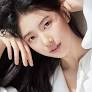
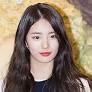
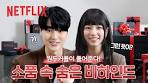
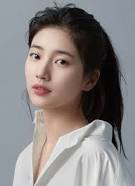
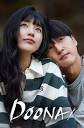
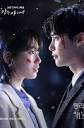
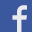
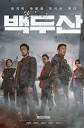
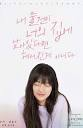
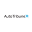
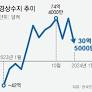
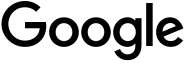

In [87]:
raw = resp.read()
raw.decode('utf-8')

In [89]:
resp.getheader('content-type')
# 이때 text/html을 보고 decode를 어떤 방식으로 할지 결정해야함
# 반드시 확인

'text/html; charset=UTF-8'

In [ ]:
# 1. Google = robots.txt 기가막히게 작성되어있고 service 적용이 잘 되어있다
# 2. Naver  = robots.txt 있지만 뻥카치고 서비스 적용 안한 것, user-agent가 없어도 잘 작동함
# 3. Daum   = robots.txt 잘 지킴, user-agent를 넣어줘야함

In [93]:
url = 'https://search.naver.com/search.naver'
qs = parse_qsl('where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%88%98%EC%A7%80')

In [91]:
url, qs

('https://search.naver.com/search.naver',
 {'where': ['nexearch'],
  'sm': ['top_hty'],
  'fbm': ['0'],
  'ie': ['utf8'],
  'query': ['수지']})

In [95]:
resp = request.urlopen(urljoin(url, '?'+urlencode(qs)))
resp.status, resp.reason,resp.getheaders()
# 얘는 header 안줬는데 에러가 안남

(200,
 'OK',
 [('Date', 'Tue, 12 Mar 2024 02:15:21 GMT'),
  ('Content-Type', 'text/html; charset=UTF-8'),
  ('Transfer-Encoding', 'chunked'),
  ('Connection', 'close'),
  ('Vary', 'Accept-Encoding'),
  ('Set-Cookie',
   'page_uid=iP+IXdqptbNsskKIScwssssssaC-151763; path=/; domain=.naver.com'),
  ('Set-Cookie',
   '_naver_usersession_=4MHgnAFa3HZ+xSJHSMHy3Q==; path=/; expires=Tue, 12-Mar-24 02:20:21 GMT; domain=.naver.com'),
  ('X-Frame-Options', 'SAMEORIGIN'),
  ('X-XSS-Protection', '1; report=/p/er/post/xss'),
  ('Cache-Control', 'no-cache, no-store, must-revalidate, max-age=0'),
  ('Pragma', 'no-cache'),
  ('Referrer-Policy', 'unsafe-url'),
  ('Vary', 'Accept-Encoding'),
  ('Server', 'nxg'),
  ('Accept-CH',
   'Sec-CH-UA, Sec-CH-UA-Arch, Sec-CH-UA-Bitness, Sec-CH-UA-Full-Version-List, Sec-CH-UA-Mobile, Sec-CH-UA-Model, Sec-CH-UA-Platform, Sec-CH-UA-Platform-Version, Sec-CH-UA-WoW64')])

In [104]:
url = 'https://search.daum.net/search'
qs = parse_qsl('w=tot&DA=YZR&t__nil_searchbox=btn&q=%EC%88%98%EC%A7%80')
# parse_qsl 꼭 넣어줘야함!


In [110]:
urljoin(url, '?'+urlencode(qs))

resp = request.urlopen(urljoin(url, '?'+urlencode(qs)))
resp.status, resp.reason, resp.getheaders()

req = request.Request(url = urljoin(url, '?'+urlencode(qs)), headers = {'user-agent':ua}, method='GET')
resp = request.urlopen(req)

raw = resp.read()
raw.decode('utf-8')

# Daum에는 ua를 확인하므로 (사람인지 아닌지 확인) 따라서, ua를 설정해줘야 한다

'<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="수지 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%EC%88%98%EC%A7%80" />\n<meta property="og:description" content="Daum 검색에서 수지에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>수지 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text/css" href=\'//search1.d

In [111]:
from urllib.error import HTTPError
from time import sleep

def retry(url, maxretries = 5):
    try:
        request.urlopen('https://www.google.com/search?q=%ED%99%A9%EC%A0%95%EB%AF%BC&oq=%5B%27%EC%88%98%EC%A7%80%27%5D&gs_lcrp=%5B%27EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D')
    except HTTPError as e:
        print(e.status)
        print(e.reason)

        if 400 <= e.status < 500:
            return None # 400번대 에러면 빨리 빠져나와야함
        if 500 <= e.status < 600:
            sleep(5)    # 하지만, DDoS마냥 계속 돌면 안되므로 일정 시간 delay를 주고 다시 시도한다
            retry(url, maxretries-1) # 500번대 에러면 다시 시도해보면 된다
        else:
            return None
        # print(e.headers())

403
Forbidden


TypeError: 'HTTPMessage' object is not callable

In [151]:
from requests import request, get
from requests.compat import urljoin, urlencode, quote, unquote
from requests.exceptions import HTTPError
# 다운 받자 이따가

In [115]:
url = 'https://www.google.com/search?q=%ED%99%A9%EC%A0%95%EB%AF%BC&oq=%5B%27%EC%88%98%EC%A7%80%27%5D&gs_lcrp=%5B%27EgZjaHJvbWUqBggAEEUYOzIGCAAQRRg7MgYIARBFGDsyBggCEEUYPNIBBzM0MmowajSoAgCwAgA%27%5D&sourceid=%5B%27chrome%27%5D&ie=%5B%27UTF-8%27%5D'
resp = request('GET', url) # Request 객체를 생성함과 동시에 req을 보낸다
# 원래라며 ua error가 존재하는데 error가 나지 않는다 왜?
# 

(b'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#54889;&#51221;&#48124; - Google &#44160;&#49353;</title><script nonce="wcVrGOksc2DWUUu80_Vu3Q">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}windo
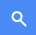
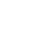
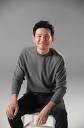
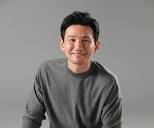
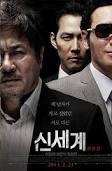
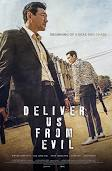
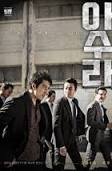
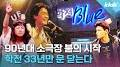
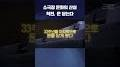
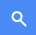
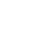
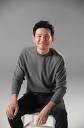
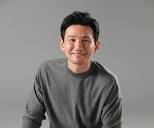
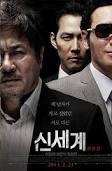
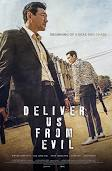
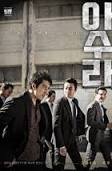
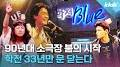
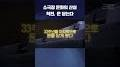

In [116]:
type(resp)  # 이전에는 HTTP resp 객체였는데 지금은 그저 resp 객체이다
resp.content, resp.text, resp.encoding  # 세 함수 모두 체크 가능한 함수들이며
# content = content를 보여준다
# text = 해당 resp의 text(HTML)로 보여준다
# resp.encoding = encode 할때 어떤 값을 어떻게 encode 했는지 보여줌

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>황정민 - Google 검색</title><script nonce="wcVrGOksc2DWUUu80_Vu3Q">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=func
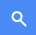
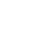
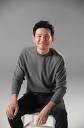
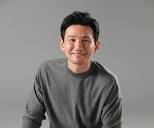
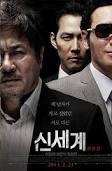
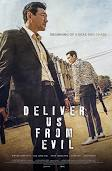
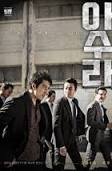
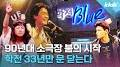
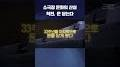

In [117]:
unescape(resp.text)

In [119]:
resp.request.headers    # 얘가 req의 header이다
# 왜 에러가 안났느냐? ua 값이 존재하기 때문에 에러가 안남
# UTF-8이 안나온 이유는 ua값을 제대로 넣지 않았기 때문이다

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [123]:
resp = request('GET', url, headers={'user-agent': ua})
resp.status_code, resp.headers
resp.request.headers
# header 확인해보면 ua를 잘 넣었기 때문에 utf-8로 나온다

{'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [124]:
resp = request('GET', url = 'https://www.google.com/search?q=수지')
resp.request.url
# hexadecimal로 안바꿔도 한글을 알아서 바꿔준다
# 너무 편함

'https://www.google.com/search?q=%EC%88%98%EC%A7%80'

In [125]:
url = 'https://httpbin.org/status/'
resp = request('GET', url+'403')

In [127]:
from urllib import request
resp = request.urlopen(url+'403')

HTTPError: HTTP Error 403: FORBIDDEN

In [128]:
resp.status_code, resp.reason
# 이렇게 403 error가 있는데 안뜨는 경우가 있음 이런건 어떻게 handle?

(403, 'FORBIDDEN')

In [131]:
# resp.raise_for_status() # 객체를 생성해서 send하고 error 났든 안났든 들고 있다가 보낼때 보여줌
# 따라서 이 raise_for_status로 확인하고 보내는 것임

#try except 구문으로 구현하면
try:
    resp.raise_for_status()
except HTTPError as e:
    print(e.response.status_code)
    print(e.response.reason)
    print(e.response.headers)
    print(e.request.headers)

# Sol. 1

403
FORBIDDEN
{'Date': 'Tue, 12 Mar 2024 03:18:34 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}
{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [134]:
# Sol. 2
url = 'https://httpbin.org/status/'
resp = request('GET', url+'500')

if 500 <= resp.status_code < 600:
    print('Error')

Error


In [152]:
url = 'https://htppbin.org/get'
resp = request('GET', url, params={'키': '벨류'})
# resp.status_code, resp.request.url

ConnectionError: HTTPSConnectionPool(host='htppbin.org', port=443): Max retries exceeded with url: /get?%ED%82%A4=%EB%B2%A8%EB%A5%98 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000027A99935190>: Failed to resolve 'htppbin.org' ([Errno 11001] getaddrinfo failed)"))

In [137]:
print(resp.text)

resp.request.body # 무슨 값이 들어가 있다
# 해당은 body에 &으로 구분지어서 들어간다  (form data로 들어감)
# data에 집어 넣었을때...

# 

# Response and Request

#### Robots

If you want to check robots.txt just add "/robots.txt" after url

ex) www.naver.com/robots.txt

Sitemap?

Sitemap is a file that showing a web content tree

###### Useful Knowledge

DOM => Make HTML code into object and showing

Preserve Log (Developer Tools) => Although web page modified, the log stores everything

Fetch/XHR => something like ajax

Robots.txt can be inside of HTML code or independent txt file

if we want to check whether our bot can access to specific path or not

```
rp = robotparser.RobotFileParser(url)
rp.can_fetch('Bot', '/search/about')
```

#### Request

We use String, Request Object

Originally, when send request, we have to change text to byte

When we get response, we have to change byte to text

If we want to see headers

```
resp = request.urlopen(url)
resp.getheaders()
>>>
[('Date', 'Tue, 12 Mar 2024 00:56:08 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('Content-Security-Policy-Report-Only',
  "object-src 'none';base-uri 'self';script-src 'nonce-DD_sA8F7twk5H3JvwpaobQ' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp"),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2024-03-12-00; expires=Thu, 11-Apr-2024 00:56:08 GMT; path=/; domain=.google.com; Secure'),
 ('Set-Cookie',
  'AEC=Ae3NU9MmE1o1zpNbX3EZG9kOjNuu3L_7fKwQhtozyA_nSesbaE9s-qgXKg; expires=Sun, 08-Sep-2024 00:56:08 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax'),
 ('Set-Cookie',
  'NID=512=VbINUUF1D9-83UzUGlS3Ct7f85QRVCmXL0o8NxqaS7GOrUBf9OFIJTdp7KJalUtdXLsMk7VXB60U86coDCtxmThpQnLc5e-8qvpZKNZccXl2IxiU6Xd3AezIYsJAioCMXHGTQnYxCgLBTvi6BNoooqTRoxjaoPwsecc5XSUI39I; expires=Wed, 11-Sep-2024 00:56:08 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close'),
 ('Transfer-Encoding', 'chunked')]
```

We have to look carefully about content-type and data-type

#### URL

HTTP status code

1. 1xx - information
2. 2xx - success
3. 3xx - redirection
4. 4xx - client error
5. 5xx - server error

Let example url is https://www.google.com/search?q=%EC%88%98%EC%A7%80&

Parameter starts from ?, so in this case param = q=%EC%88%98%EC%A7%80&

Parameter can be divided into key and value

key = q, value = %EC%88%98%EC%A7%80& (and this is percent-encoding)

Percent encoding + hexadecimal means read value in hexadecimal

If we want to give two value, put & between first argument and second argument

#### Encdoe and Decode

```
from urllib.parse import quote, quote_plus, unquote, unquote_plus
from urllib.parse import parse_qs, urlencode, urljoin, urlparse, urlunparse
```

1. quote - change value into %hexadecimal
2. quote_plus - make space into +
3. unquote - change hexadecimal into ordinary value
4. unquote_plus - change hexadecimal into ordinary value and make + into space

1. rst.scheme - show scheme
2. rst.netloc - show netloc
3. rst.path - show path
4. rst.query - show query value
5. rst.fragment - show fragment

scheme: https

://

host: nid.naver.com

path: /nidlogin.login

params: values after question mark

QueryString: QS

fragement: # value, such as #page-top

### How to change url?

```
urljoin(url, '/search/about)    # add path behind url
urljoin(url, 'https://naver.com)    # can modify url itself
```

## Moduel : request

```
import urllib import request

request.urlopen('https://www.google.com/search?q=수지')
# Error came
```

Why? this is encoding error

To solve we have to alter

```
request.urlopen('https://www.google.com/search?q='+quote('수지'))
```

Solutions
1. URL(QS) is non-ASCII, put quote or urlencode
2. User-agent => to avoid robots.txt
2. add) in the robots.txt, every robots can be denied in every path
2. add) To avoid, we put user-agent from developer tools

```
ua = 'Mozilla/5,0~'
req = request.Request(url = 'https://www.google.com/search?q='+quote('수지'),
                    headers = {'user-agent': ua}, method='GET')
```

Notice! put method in REST method

If we want to check something from request

req.headers, req.method, req.full_url

req headers, what method using, full url

and then put response

```
resp = request.urlopen(req) # req is declared above
```

to read raw data

```
raw = resp.read()
raw.decode('utf-8')  # decode raw into utf-8
```

To determine which one to use decoding see content-type

```
resp.getheader('content-type')
>>>
'text/html; charset=UTF-8'
```

Example code for Naver

```
url = 'https://search.naver.com/search.naver'
qs = parse_qsl('where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%88%98%EC%A7%80')

resp = request.urlopen(urljoin(url, '?'+urlencode(qs)))

raw = resp.read()
raw.decode('utf-8')
```

If we want to put user-agent?

```
resp = request.urlopen(urljoin(url, '?'+urlencode(qs)))

#into

req = request.Request(url = urljoin(url, '?'+urlencode(qs)), headers = {'user-agent':ua}, method = 'GET')
resp = request.urlopen(req)
```

### Exception HTTP Error

```
from urllib.error import HTTPError
from time import sleep

def retry(url, maxretires = 5):
    try:
        request.urlopen('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%88%98%EC%A7%80')
    except HTTPError as e:
        print(e.status)
        print(e.reason)

        if 400 <= e.status < 500:
            return None 
        if 500 <= e.status < 600:
            sleep(5)    
            retry(url, maxretries-1) 
        else:
            return None
```

## Request Library

Request library makes more comfortable to use those

```
from requests import request, get
from requests.compat import urljoin, urlencode, quote, unquote
from requests.exceptions import HTTPError
```

Firstly, import needed things

```
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%88%98%EC%A7%80'
resp = request('GET', url)  # this is resp object

unescape(resp.text) # show html code
resp.request.headers    # This is req header

# To put ua
resp = request('GET', url, headers = {'user-agent': ua})

# To check
resp.status_code, resp.headers, resp.request.headers
```

To add key and value

```
url = 'https://htppbin.org/get'
resp = request('GET', url, params={'key': 'value'})
```

Especially, resp.headers automatically, change Koreans into hexadecimal

But all resp.status_code and resp.reason does not show the errors

#### Solution 1. resp.raise_for_status()

This function makes object and send although there is error or not and show after send the packet

```
try:
    resp.raise_for_status()
except HTTPError as e:
    print(e.response.status_code)
    print(e.response.reason)
    print(e.response.headers)
    print(e.request.headers)
```

#### Solution 2. if statement

```
url = 'https://httpbin.org/status/'
resp = request('GET', url+'500')

if 500 <= resp.status_code < 600:
    print('Error')
```